In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#model for regression and error metrics
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Import the another model here (Random forest) module
# from sklearn.linear_model import LinearRegression


#other Libraries
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [158]:
train = pd.read_csv("C://Users//USER//Documents//EXPLORE//Advanced Regression//Predict//df_train.csv",index_col=[0])
test = pd.read_csv("C://Users//USER//Documents//EXPLORE//Advanced Regression//Predict//df_test.csv",index_col=[0])

In [159]:
train.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Column1,,,,,,,,,,,,,,,,,,,,,
0,1/1/2015 3:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1/1/2015 6:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,1/1/2015 9:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,1/1/2015 12:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,1/1/2015 15:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [160]:
test.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [161]:
combined = pd.concat([train, test])

In [162]:
def data_info(data):
    print('1) Number of columns are : ',data.shape[1])
    print('2) Number of rows are : ',data.shape[0])
    print('3) Total number of data-points :',data.size)
    numerical_features = [f for f in data.columns if data[f].dtypes!='O']
    print('4) Count of Numerical Features :',len(numerical_features))
    cat_features = [c for c in data.columns if data[c].dtypes=='O']
    print('5) Count of Categorical Features :',len(cat_features))


In [163]:
data_info(combined)

1) Number of columns are :  48
2) Number of rows are :  11683
3) Total number of data-points : 560784
4) Count of Numerical Features : 45
5) Count of Categorical Features : 3


In [164]:
def check_features_with_missing_values(data):
    x = data.isnull().sum().sum()/(data.shape[0]*data.shape[1])*100
    print('Percentage of Overall Missing Values is ' ,round(x,2) ,'%')
    print('Missing Value Estimation :')
    for i in data.columns:
        col_miss = round(data[i].isnull().sum()/len(data[i]) * 100, 2)
        if data[i].isna().sum() > 0:
            print('The Feature',i,'has a total of '+ str(data[i].isna().sum()) + ' missing values which translates to ' +
                 str(col_miss) + '% of values missing in that column')

In [165]:
check_features_with_missing_values(combined)

Percentage of Overall Missing Values is  0.97 %
Missing Value Estimation :
The Feature Valencia_pressure has a total of 2522 missing values which translates to 21.59% of values missing in that column
The Feature load_shortfall_3h has a total of 2920 missing values which translates to 24.99% of values missing in that column


# Hypothesis 1: Weather features have similar trends for all cities

In [166]:
wind_deg = [cols for cols in combined.columns if 'wind_deg' in cols]
wind_deg

['Valencia_wind_deg', 'Bilbao_wind_deg', 'Barcelona_wind_deg']

In [167]:
wind_speed = [cols for cols in combined.columns if 'wind_speed' in cols]
wind_speed

['Madrid_wind_speed',
 'Valencia_wind_speed',
 'Bilbao_wind_speed',
 'Barcelona_wind_speed',
 'Seville_wind_speed']

In [168]:
rain_1h = [cols for cols in combined.columns if 'rain_1h' in cols]
rain_1h

['Bilbao_rain_1h', 'Barcelona_rain_1h', 'Seville_rain_1h', 'Madrid_rain_1h']

In [169]:
rain_3h = [cols for cols in combined.columns if 'rain_3h' in cols]
rain_3h

['Seville_rain_3h', 'Barcelona_rain_3h']

In [170]:
humidity = [cols for cols in combined.columns if 'humidity' in cols]
humidity

['Seville_humidity', 'Madrid_humidity', 'Valencia_humidity']

In [171]:
clouds_all = [cols for cols in combined.columns if 'clouds' in cols]
clouds_all

['Bilbao_clouds_all', 'Seville_clouds_all', 'Madrid_clouds_all']

In [172]:
pressure = [cols for cols in combined.columns if 'pressure' in cols]
pressure

['Seville_pressure',
 'Barcelona_pressure',
 'Bilbao_pressure',
 'Valencia_pressure',
 'Madrid_pressure']

In [173]:
snow_3h = [cols for cols in combined.columns if 'snow_3h' in cols]
snow_3h

['Bilbao_snow_3h', 'Valencia_snow_3h']

In [174]:
temp_min = [cols for cols in combined.columns if 'temp_min' in cols]
temp_min

['Valencia_temp_min',
 'Bilbao_temp_min',
 'Barcelona_temp_min',
 'Seville_temp_min',
 'Madrid_temp_min']

In [175]:
temp_max = [cols for cols in combined.columns if 'temp_max' in cols]
temp_max

['Seville_temp_max',
 'Valencia_temp_max',
 'Barcelona_temp_max',
 'Madrid_temp_max',
 'Bilbao_temp_max']

In [176]:
shortfall = [cols for cols in combined.columns if 'shortfall' in cols]
shortfall

['load_shortfall_3h']

In [177]:
temp = [cols for cols in combined.columns if cols is '%temp']
temp

[]

In [178]:
def descriptive_stat(data,lst):
    subset = data[lst].describe().T
    return subset


In [179]:
def dist_plot(data,lst):
    plot = data[lst].hist(layout = (4,3), figsize=(24, 24))
    #plot.set_color('#00cfcc')
    return plot

In [180]:
descriptive_stat(combined,wind_deg)

,count,mean,std,min,25%,50%,75%,max
Bilbao_wind_deg,11683.0,159.878855,101.005654,0.0,76.666667,145.666667,233.333333,360.0
Barcelona_wind_deg,11683.0,187.654241,88.694717,0.0,116.666667,193.333333,260.000000,360.0


array([[<AxesSubplot:title={'center':'Bilbao_wind_deg'}>,
        <AxesSubplot:title={'center':'Barcelona_wind_deg'}>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

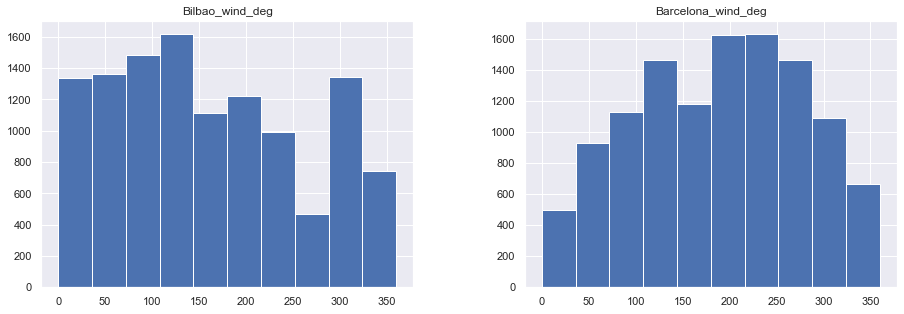

In [181]:
dist_plot(combined, wind_deg)

In [182]:
descriptive_stat(combined,wind_speed)

,count,mean,std,min,25%,50%,75%,max
Madrid_wind_speed,11683.0,2.433750,1.831762,0.0,1.000000,2.000000,3.333333,13.333333
Valencia_wind_speed,11683.0,2.692873,2.321759,0.0,1.000000,2.000000,3.666667,52.000000
Bilbao_wind_speed,11683.0,1.958629,1.696043,0.0,1.000000,1.333333,2.666667,12.666667
Barcelona_wind_speed,11683.0,2.782419,1.758587,0.0,1.333333,2.333333,3.666667,12.666667
Seville_wind_speed,11683.0,2.483067,1.705508,0.0,1.000000,2.000000,3.333333,12.666667


array([[<AxesSubplot:title={'center':'Madrid_wind_speed'}>,
        <AxesSubplot:title={'center':'Valencia_wind_speed'}>,
        <AxesSubplot:title={'center':'Bilbao_wind_speed'}>],
       [<AxesSubplot:title={'center':'Barcelona_wind_speed'}>,
        <AxesSubplot:title={'center':'Seville_wind_speed'}>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

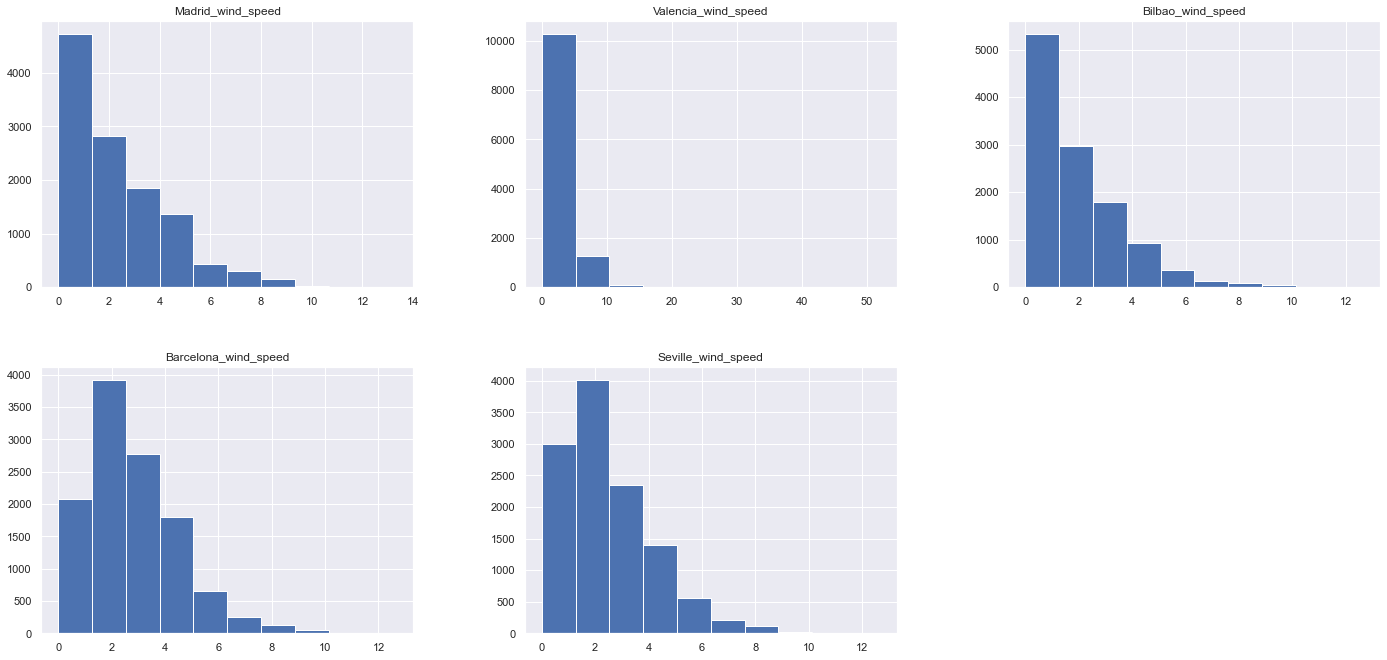

In [183]:
dist_plot(combined,wind_speed)

In [184]:
descriptive_stat(combined,rain_1h)

,count,mean,std,min,25%,50%,75%,max
Bilbao_rain_1h,11683.0,0.118698,0.334918,0.0,0.0,0.0,0.1,3.0
Barcelona_rain_1h,11683.0,0.108534,0.556794,0.0,0.0,0.0,0.0,12.0
Seville_rain_1h,11683.0,0.041120,0.180425,0.0,0.0,0.0,0.0,3.0
Madrid_rain_1h,11683.0,0.043328,0.163996,0.0,0.0,0.0,0.0,3.0


array([[<AxesSubplot:title={'center':'Bilbao_rain_1h'}>,
        <AxesSubplot:title={'center':'Barcelona_rain_1h'}>,
        <AxesSubplot:title={'center':'Seville_rain_1h'}>],
       [<AxesSubplot:title={'center':'Madrid_rain_1h'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

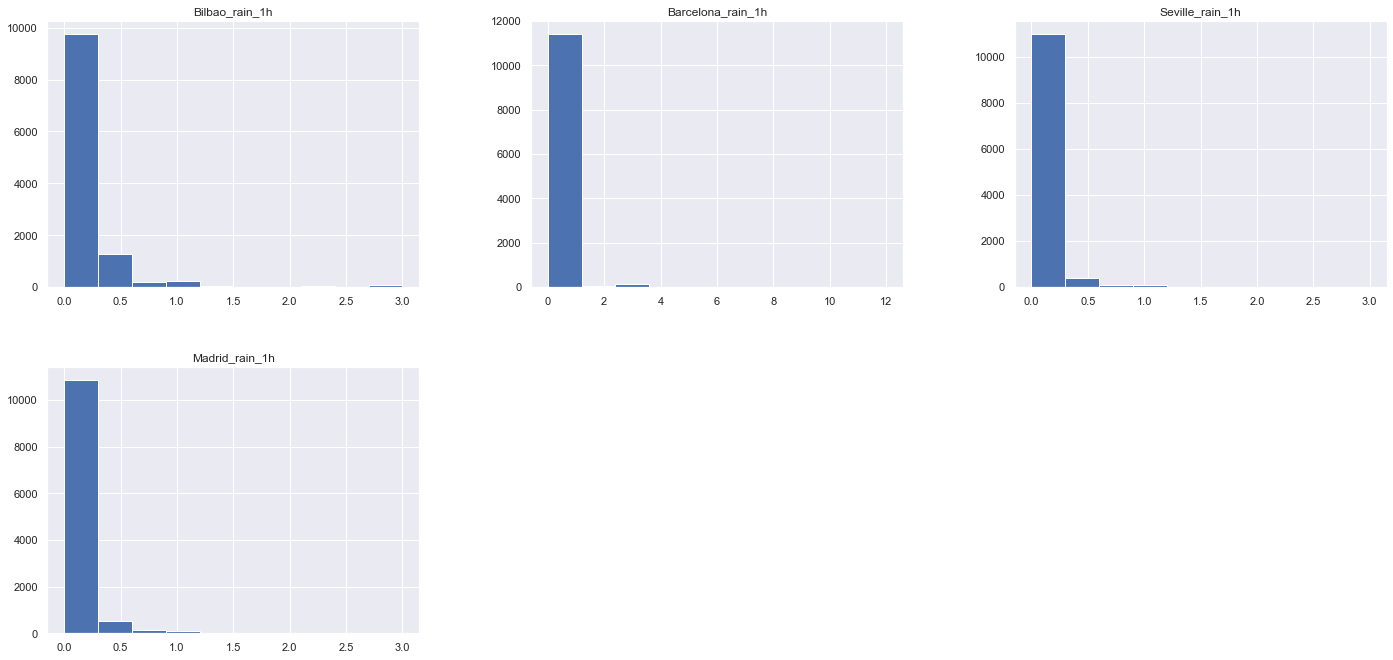

In [185]:
dist_plot(combined, rain_1h)

In [186]:
descriptive_stat(combined,rain_3h)

,count,mean,std,min,25%,50%,75%,max
Seville_rain_3h,11683.0,0.000182,0.003171,0.0,0.0,0.0,0.0,0.093333
Barcelona_rain_3h,11683.0,0.000331,0.003466,0.0,0.0,0.0,0.0,0.093000


array([[<AxesSubplot:title={'center':'Seville_rain_3h'}>,
        <AxesSubplot:title={'center':'Barcelona_rain_3h'}>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

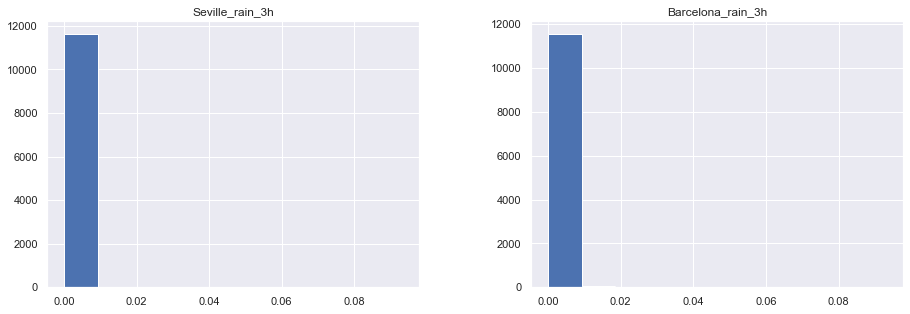

In [187]:
dist_plot(combined, rain_3h)

In [188]:
descriptive_stat(combined,humidity)

,count,mean,std,min,25%,50%,75%,max
Seville_humidity,11683.0,63.774687,22.219380,8.333333,46.333333,67.000000,83.000000,100.0
Madrid_humidity,11683.0,58.721818,24.390621,6.333333,38.000000,59.333333,80.000000,100.0
Valencia_humidity,11683.0,65.091814,19.040927,10.333333,51.333333,66.333333,80.666667,100.0


array([[<AxesSubplot:title={'center':'Seville_humidity'}>,
        <AxesSubplot:title={'center':'Madrid_humidity'}>,
        <AxesSubplot:title={'center':'Valencia_humidity'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

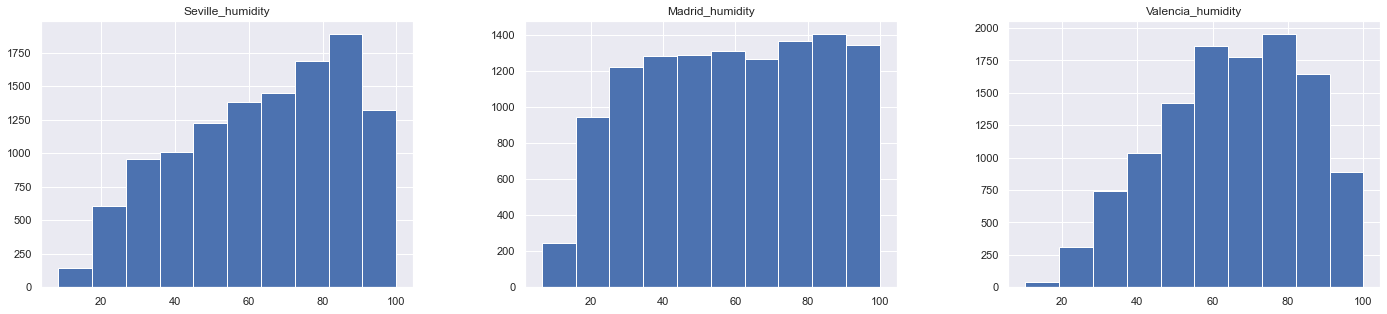

In [189]:
dist_plot(combined, humidity)

In [190]:
descriptive_stat(combined,clouds_all)

,count,mean,std,min,25%,50%,75%,max
Bilbao_clouds_all,11683.0,43.440712,32.046215,0.0,12.0,45.0,75.000000,100.000000
Seville_clouds_all,11683.0,14.155268,24.541321,0.0,0.0,0.0,20.000000,97.333333
Madrid_clouds_all,11683.0,20.668692,28.478087,0.0,0.0,0.0,38.333333,100.000000


array([[<AxesSubplot:title={'center':'Bilbao_clouds_all'}>,
        <AxesSubplot:title={'center':'Seville_clouds_all'}>,
        <AxesSubplot:title={'center':'Madrid_clouds_all'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

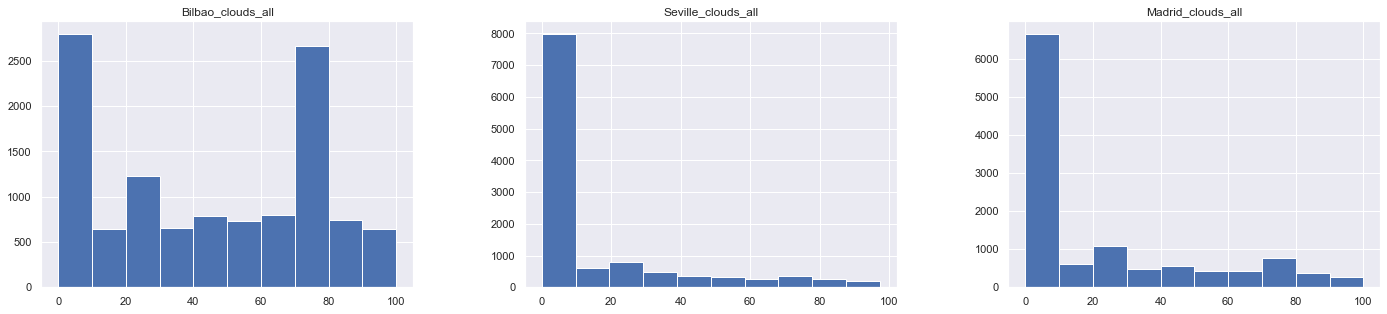

In [191]:
dist_plot(combined, clouds_all)

In [192]:
descriptive_stat(combined,pressure)

,count,mean,std,min,25%,50%,75%,max
Barcelona_pressure,11683.0,1287.326015,12189.057338,670.666667,1013.666667,1017.333333,1021.166667,1.001411e+06
Bilbao_pressure,11683.0,1017.482011,9.753552,971.333333,1013.333333,1018.666667,1023.333333,1.042000e+03
Valencia_pressure,9161.0,1012.346687,8.817473,972.666667,1010.666667,1015.000000,1018.000000,1.021667e+03
Madrid_pressure,11683.0,1011.797412,19.983122,927.666667,1012.666667,1017.333333,1021.666667,1.038000e+03


array([[<AxesSubplot:title={'center':'Barcelona_pressure'}>,
        <AxesSubplot:title={'center':'Bilbao_pressure'}>,
        <AxesSubplot:title={'center':'Valencia_pressure'}>],
       [<AxesSubplot:title={'center':'Madrid_pressure'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

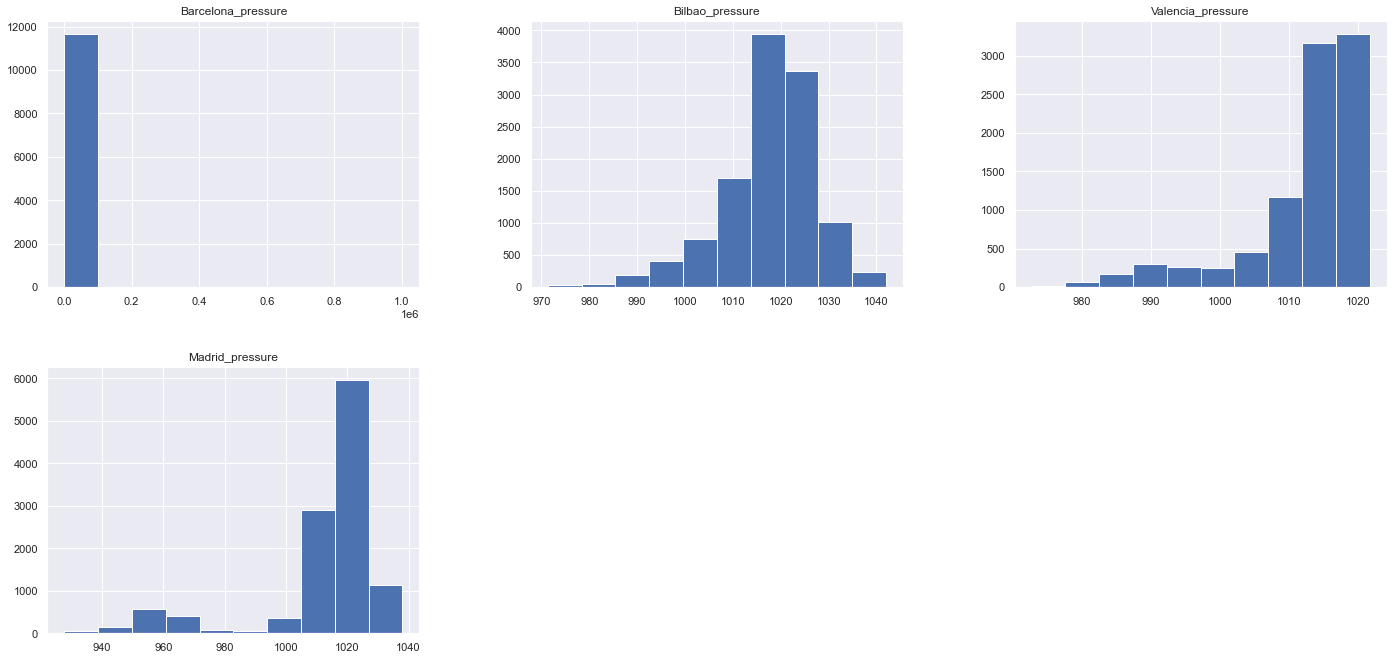

In [193]:
dist_plot(combined, pressure)

In [194]:
descriptive_stat(combined,snow_3h)

,count,mean,std,min,25%,50%,75%,max
Bilbao_snow_3h,11683.0,0.023936,0.482817,0.0,0.0,0.0,0.0,21.300000
Valencia_snow_3h,11683.0,0.000154,0.010277,0.0,0.0,0.0,0.0,0.791667


array([[<AxesSubplot:title={'center':'Bilbao_snow_3h'}>,
        <AxesSubplot:title={'center':'Valencia_snow_3h'}>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

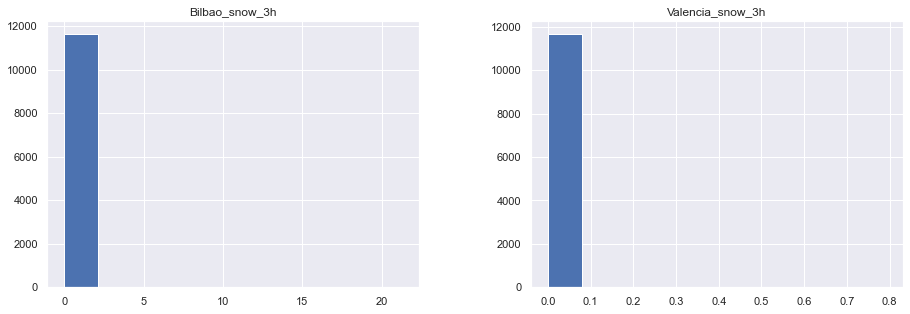

In [195]:
dist_plot(combined, snow_3h)

In [196]:
descriptive_stat(combined,temp_min)

,count,mean,std,min,25%,50%,75%,max
Valencia_temp_min,11683.0,290.229939,7.003619,269.888000,284.928833,289.820000,295.491667,310.272000
Bilbao_temp_min,11683.0,284.993657,6.730076,264.483333,280.122526,284.816667,289.816667,309.816667
Barcelona_temp_min,11683.0,288.616766,6.391989,269.483333,284.150000,288.276333,293.483333,306.816667
Seville_temp_min,11683.0,291.263219,8.136234,270.150000,285.483333,290.382000,296.641333,314.816667
Madrid_temp_min,11683.0,287.056222,9.093455,264.983333,280.150000,285.816667,293.708917,310.383333


array([[<AxesSubplot:title={'center':'Valencia_temp_min'}>,
        <AxesSubplot:title={'center':'Bilbao_temp_min'}>,
        <AxesSubplot:title={'center':'Barcelona_temp_min'}>],
       [<AxesSubplot:title={'center':'Seville_temp_min'}>,
        <AxesSubplot:title={'center':'Madrid_temp_min'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

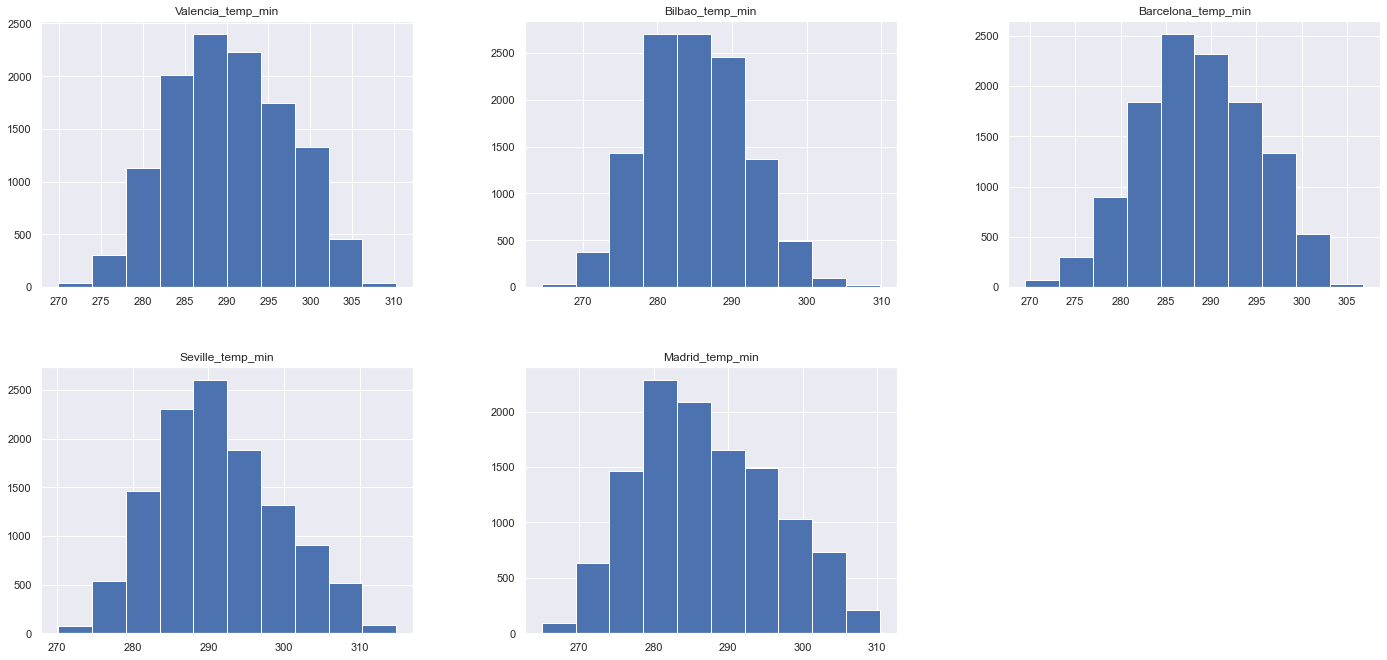

In [197]:
dist_plot(combined, temp_min)

In [198]:
descriptive_stat(combined,temp_max)

,count,mean,std,min,25%,50%,75%,max
Seville_temp_max,11683.0,296.007363,8.929160,272.063000,289.483333,295.483333,302.816667,320.483333
Valencia_temp_max,11683.0,291.362722,7.441278,269.888000,285.783333,291.150000,297.159167,314.263333
Barcelona_temp_max,11683.0,291.042128,7.236360,272.150000,285.338609,290.150000,296.816667,314.076667
Madrid_temp_max,11683.0,289.377372,9.594562,264.983333,282.150000,287.843333,296.483333,314.483333
Bilbao_temp_max,11683.0,288.095397,6.898601,269.063000,283.150000,287.816667,292.483333,317.966667


array([[<AxesSubplot:title={'center':'Seville_temp_max'}>,
        <AxesSubplot:title={'center':'Valencia_temp_max'}>,
        <AxesSubplot:title={'center':'Barcelona_temp_max'}>],
       [<AxesSubplot:title={'center':'Madrid_temp_max'}>,
        <AxesSubplot:title={'center':'Bilbao_temp_max'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

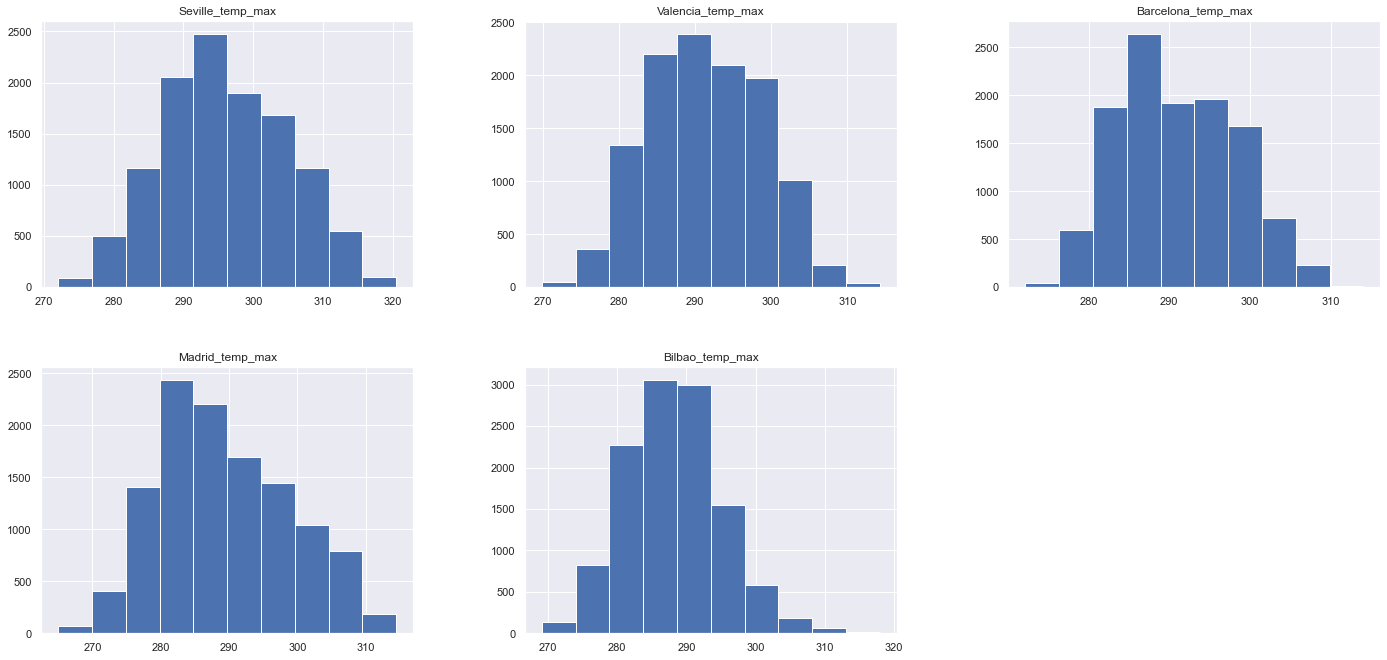

In [199]:
dist_plot(combined, temp_max)

In [200]:
descriptive_stat(combined,shortfall)

,count,mean,std,min,25%,50%,75%,max
load_shortfall_3h,8763.0,10673.857612,5218.046404,-6618.0,7390.333333,11114.66667,14498.166665,31904.0


# Load shortfall is subject to variation in time

Engineer time features

In [201]:
weekdays = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3: 'Thursday', 4: 'Friday', 5:'Saturday', 6:'Sunday'}

In [202]:
hour_dict = {'morning': list(np.arange(5,12)),'afternoon': list(np.arange(12,16)), 'evening': list(np.arange(16,22)),
            'night': [22, 23, 0, 1, 2, 3, 4]}

In [203]:
hour_dict

{'morning': [5, 6, 7, 8, 9, 10, 11],
 'afternoon': [12, 13, 14, 15],
 'evening': [16, 17, 18, 19, 20, 21],
 'night': [22, 23, 0, 1, 2, 3, 4]}

In [204]:
def time_of_day(x):
    if x in hour_dict['morning']:
        return 'morning'
    elif x in hour_dict['afternoon']:
        return 'afternoon'
    elif x in hour_dict['evening']:
        return 'evening'
    else:
        return 'night'

In [205]:
def seasons(month):
    """adding season based on the data on SDGE's site -> https://www.sdge.com/whenmatters#how-it-works; 
       months from June to October are denoted as 'summer' and months from November to May as 'winter'. """
    if month in [6,7,8]:
        return "summer"
    elif month in [9,10,11]:
        return 'autumn'
    elif month in [12,1,2]:
        return 'winter'
    else:
        return "spring"

In [206]:
def eng_time(data):
    data['time'] = pd.to_datetime(data['time'])
    data['Day'] = data['time'].dt.day
    data['Month'] = data['time'].dt.month
    data['Year'] = data['time'].dt.year
    data['hour'] = data['time'].dt.hour
    data['minute'] = data['time'].dt.minute
    data['second'] = data['time'].dt.second
    data['weekday'] = data['time'].dt.weekday.map(weekdays)
    data['seasons'] = data['time'].dt.month.apply(seasons)
    data['time_of_day'] = data['hour'].apply(time_of_day)
    column_list = ['time','Day','Month','Year','hour','minute','second','weekday', 'seasons', 'time_of_day'] + list(data.columns[1:-9])
    return data[column_list]


In [207]:
combined = eng_time(combined)#.Seville_pressure .unique()

In [208]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 11682
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  11683 non-null  datetime64[ns]
 1   Day                   11683 non-null  int64         
 2   Month                 11683 non-null  int64         
 3   Year                  11683 non-null  int64         
 4   hour                  11683 non-null  int64         
 5   minute                11683 non-null  int64         
 6   second                11683 non-null  int64         
 7   weekday               11683 non-null  object        
 8   seasons               11683 non-null  object        
 9   time_of_day           11683 non-null  object        
 10  Madrid_wind_speed     11683 non-null  float64       
 11  Valencia_wind_deg     11683 non-null  object        
 12  Bilbao_rain_1h        11683 non-null  float64       
 13  Valencia_wind_sp

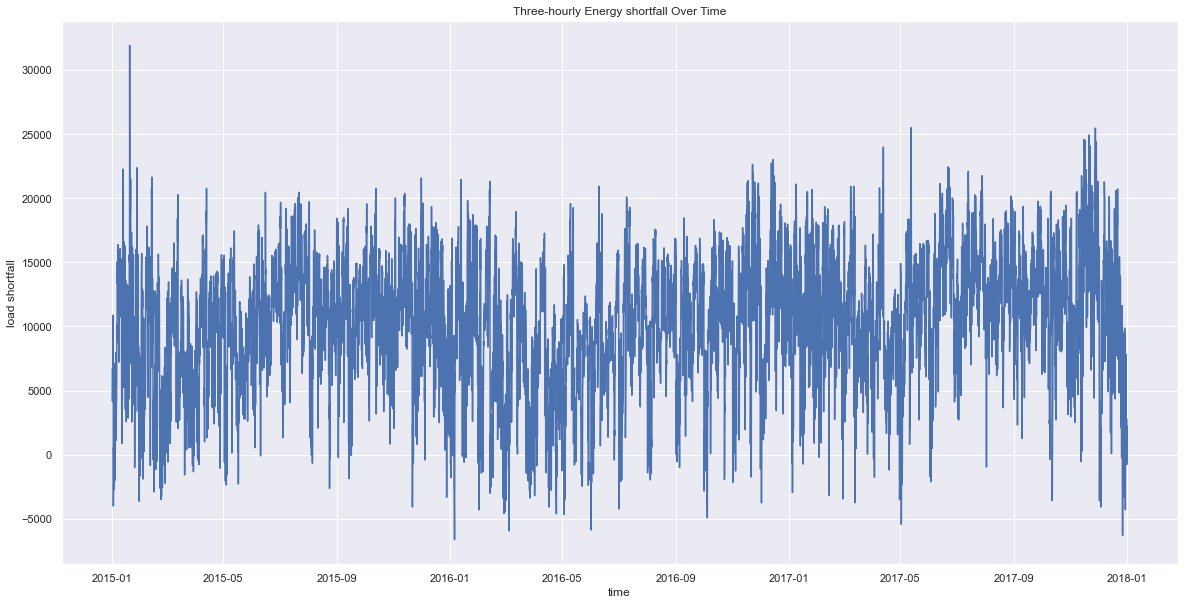

In [209]:
plt.figure(figsize=(20,10))
plt.title('Three-hourly Energy shortfall Over Time')
plt.xlabel('time')
plt.ylabel('load shortfall')
sns.lineplot(combined['time'],combined['load_shortfall_3h'])
plt.show()

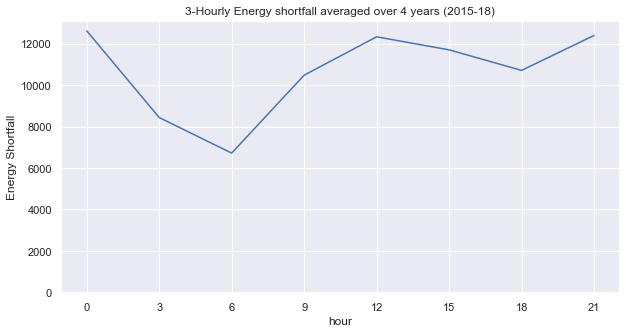

In [210]:
combined.groupby('hour')['load_shortfall_3h'].mean().plot(figsize = (10,5))
plt.ylabel('Energy Shortfall')
plt.ylim([0, max(combined.groupby('hour')['load_shortfall_3h'].mean()) + 500])
plt.xticks(combined['hour'].unique())
plt.title('3-Hourly Energy shortfall averaged over 4 years (2015-18)');

In [211]:
combined['time_of_day'] = pd.Categorical(combined['time_of_day'], categories=['morning','afternoon', 'evening', 'night'], 
                                         ordered= True)

In [212]:
combined['seasons'] = pd.Categorical(combined['seasons'], categories=['spring','summer', 'autumn', 'winter'], 
                                           ordered= True)

In [213]:
combined['weekday'] = pd.Categorical(combined['weekday'], categories=['Monday', 'Tuesday', 'Wednesday',
                                                                        'Thursday', 'Friday','Saturday', 'Sunday'], ordered= True)


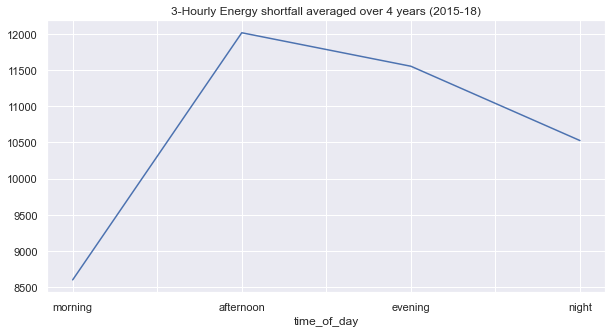

In [214]:
combined.groupby('time_of_day')['load_shortfall_3h'].mean().plot(figsize = (10,5))
# plt.ylabel('Energy Shortfall')
#plt.ylim([4000, max(combined.groupby('time_of_day')['load_shortfall_3h'].mean()) + 500])
# plt.xticks(['morning','afternoon','evening','night'])
plt.title('3-Hourly Energy shortfall averaged over 4 years (2015-18)');

In [215]:
hour_weekday = combined.pivot_table(values='load_shortfall_3h', index='hour', columns = 'weekday', aggfunc = 'mean')
hour_weekday

weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour,,,,,,,
0,11121.707265,13107.987180,13322.237179,13499.350428,13219.345011,12780.632697,11284.978769
3,7528.382479,8668.677350,8860.299145,8868.065817,9184.473461,8593.259023,7343.584395
6,6147.767094,7246.850427,7201.256410,7261.065817,7507.832272,6461.571125,5210.422505
9,11010.322650,11712.192308,11849.615385,11500.288747,11708.498938,8676.397027,6917.588110
12,13033.596154,13383.521367,13534.630342,13144.278132,13253.378981,11046.833333,8945.532909
15,12524.178494,12684.743590,12718.370726,12459.823780,12489.702760,10266.259024,8780.450855
18,11703.591398,11862.696581,11978.055556,11548.333333,11421.513800,8790.753715,7683.871795
21,13218.873931,13363.330128,13542.908119,13184.887474,12918.178344,10601.131635,9959.704883


In [216]:
weekday_season = combined.pivot_table(values='load_shortfall_3h', index='weekday', columns = 'seasons', aggfunc = 'mean')
weekday_season

seasons,spring,summer,autumn,winter
weekday,,,,
Monday,9210.067308,11766.618750,12022.376068,10089.156733
Tuesday,9261.422917,12829.621795,12914.723825,11055.225877
Wednesday,9622.105208,12436.408333,12978.642628,11490.166667
Thursday,9083.442308,12796.976042,12490.733974,11319.942122
Friday,9397.542201,12260.832265,13229.278312,10976.285417
Saturday,8290.727030,10875.362179,10507.056624,8953.193750
Sunday,6423.843229,9760.625000,9302.177083,7619.724731


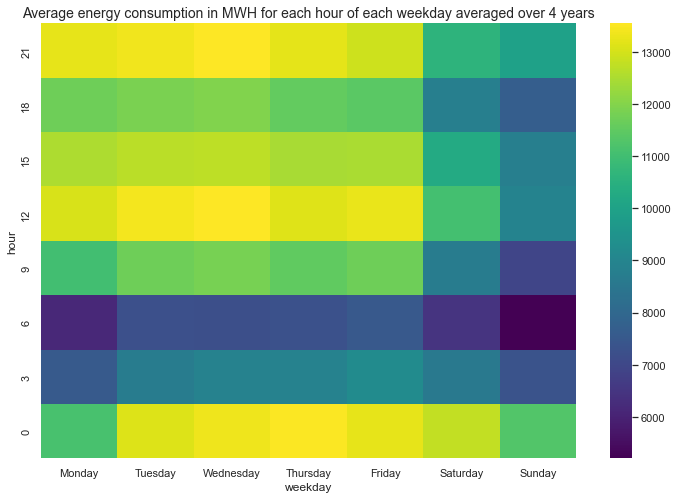

In [217]:
_ = plt.figure(figsize=(12, 8))
ax = sns.heatmap(hour_weekday.sort_index(ascending = False), cmap='viridis')
#_ = plt.title('Average energy consumption in MWH for each hour of each weekday over the entire period')
_ = ax.set_title("Average energy consumption in MWH for each hour of each weekday averaged over 4 years", fontsize = 14)

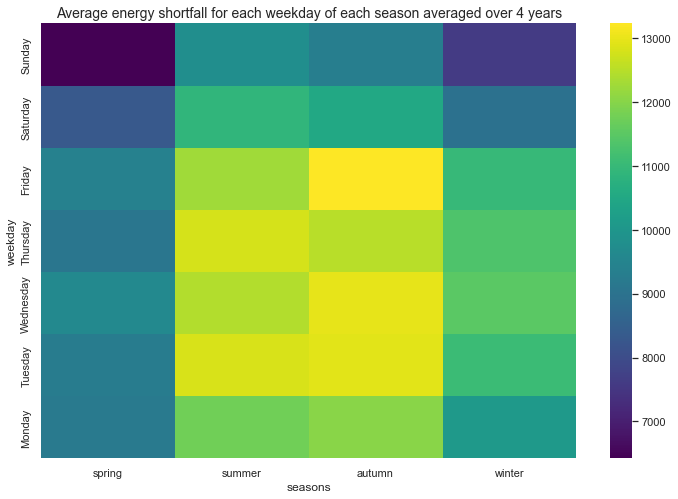

In [218]:
_ = plt.figure(figsize=(12, 8))
ax = sns.heatmap(weekday_season.sort_index(ascending = False), cmap='viridis')
#_ = plt.title('Average energy consumption in MWH for each hour of each weekday over the entire period')
_ = ax.set_title("Average energy shortfall for each weekday of each season averaged over 4 years", fontsize = 14)

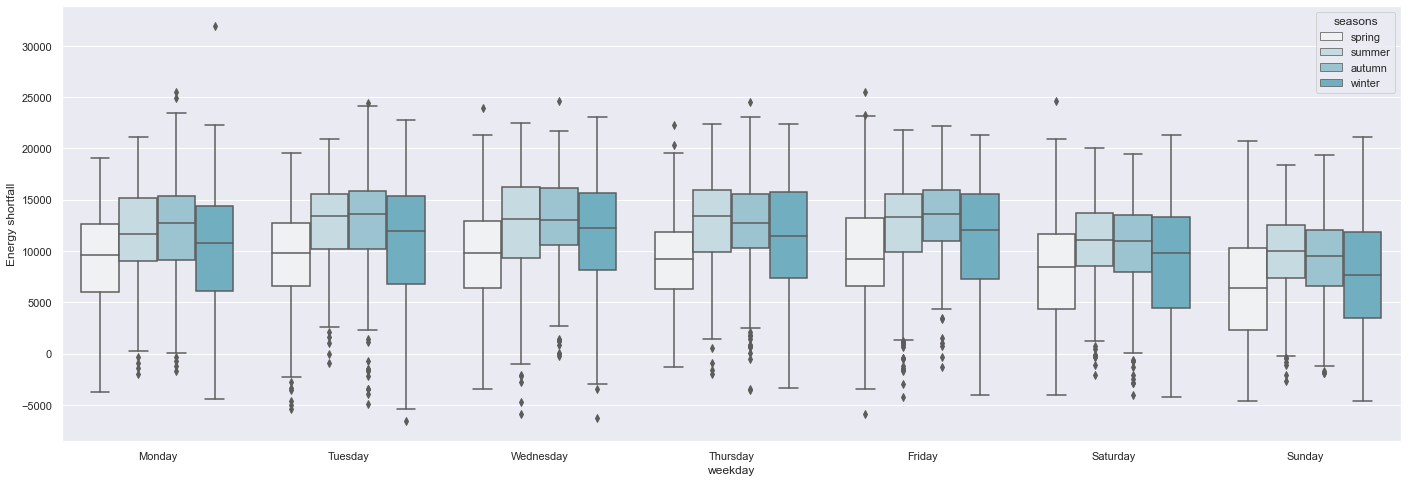

In [219]:
_ = plt.figure(figsize = (24,8))
_ = sns.boxplot(x = 'weekday', y = 'load_shortfall_3h', data = combined, color='c', hue='seasons')
_ = plt.ylabel('Energy shortfall')

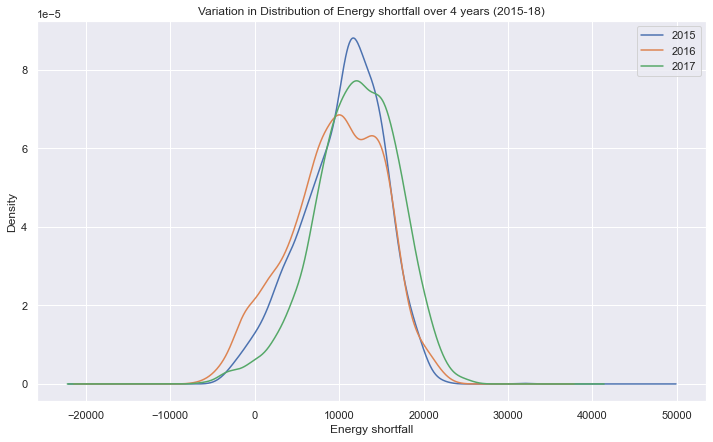

In [220]:
for year in [2015, 2016,2017]:
    combined[combined['Year'] == year]['load_shortfall_3h'].plot(kind='density', figsize = (12,7),
                                                                 legend = True, label = year)
_ = plt.xlabel('Energy shortfall')
_ = plt.title('Variation in Distribution of Energy shortfall over 4 years (2015-18)')

In [221]:
df1 = combined.groupby(['Month', 'Year'])['load_shortfall_3h'].mean()
df1 = pd.DataFrame(df1)

In [222]:
df1un = df1.unstack(level = 'Month')
df1un.reset_index(inplace = True)
df1un.head()

Year load_shortfall_3h                                           \
Month                       1             2             3            4   
0      2015       9567.351701   7327.774775   8062.243280  9621.084722   
1      2016      10238.865592   7671.862069   7221.925403  6697.099306   
2      2017      11599.967742  11619.313988  10378.693548  9492.013889   
3      2018               NaN           NaN           NaN          NaN   

                                                                             \
Month             5             6             7             8             9   
0       8300.656586  11351.218056  13736.841398  10525.533602  11033.136111   
1       7376.690860   8754.598611  10656.024194  10763.354839  10313.142361   
2      11604.251344  13419.669444  14121.401881  13021.577957  12931.165278   
3               NaN           NaN           NaN           NaN           NaN   

                                                 
Month            10            11            12  
0      11818.213374  11995.618056  11061.766801  
1      10478.312836  12173.111111  12362.698925  
2      12115.074933  14473.657639  10041.087366  
3               NaN           NaN           NaN

In [223]:
melt = pd.melt(df1un, id_vars='Year', value_name='Avg. monthly energy consumption MWH')
melt.head()

,Year,NaN,Month,Avg. monthly energy consumption MWH
0,2015,load_shortfall_3h,1,9567.351701
1,2016,load_shortfall_3h,1,10238.865592
2,2017,load_shortfall_3h,1,11599.967742
3,2018,load_shortfall_3h,1,NaN
4,2015,load_shortfall_3h,2,7327.774775


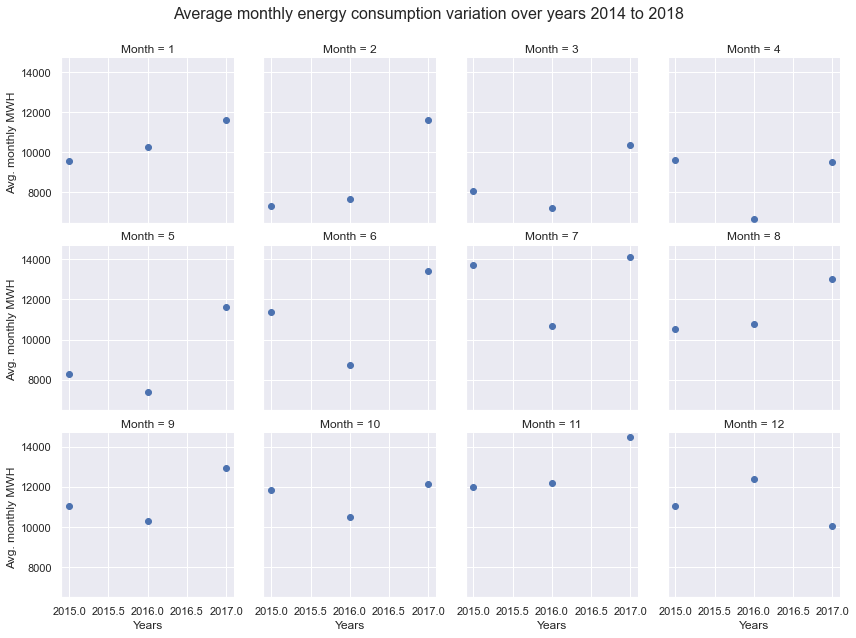

In [224]:
g = sns.FacetGrid(melt, col="Month", margin_titles = True, col_wrap = 4)
g.map(plt.scatter, "Year", "Avg. monthly energy consumption MWH");
g.set_axis_labels("Years", "Avg. monthly MWH ");
g.set(ylim=(melt['Avg. monthly energy consumption MWH'].min() - 200, melt['Avg. monthly energy consumption MWH'].max() + 200));
_ = plt.subplots_adjust(top=0.9)
_ = g.fig.suptitle('Average monthly energy consumption variation over years 2014 to 2018', fontsize = 16 )

# All weather features have a significant contribution to increased energy shortfall 

array([[<AxesSubplot:title={'center':'load_shortfall_3h'}>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

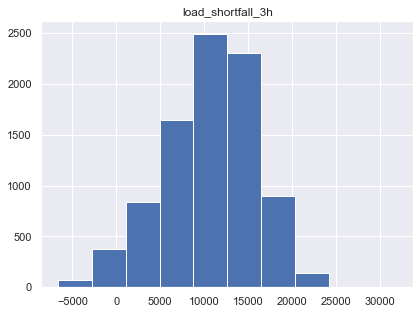

In [225]:
dist_plot(combined, shortfall)

In [226]:
def corr(data,lst, variable):
    v_list = [v for v in data[lst]]
    v_list.append('load_shortfall_3h')
    frmat = sns.set(rc = {'figure.figsize':(14,6)})
    heatmap = sns.heatmap(data[v_list].corr(), annot = True, fmt='.2g',cmap= 'summer')
    return heatmap

<AxesSubplot:>

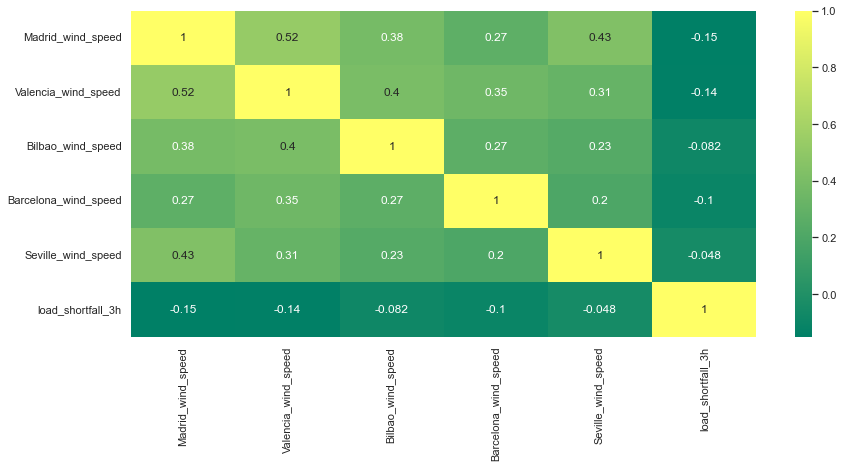

In [227]:
corr(combined, wind_speed, 'load_shortfall_3h')

<AxesSubplot:>

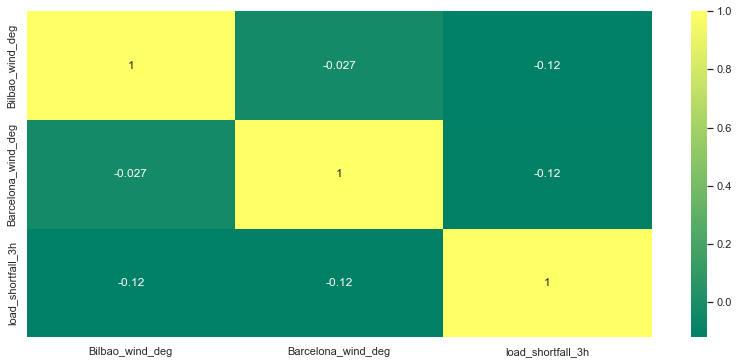

In [228]:
corr(combined, wind_deg, 'load_shortfall_3h')

<AxesSubplot:>

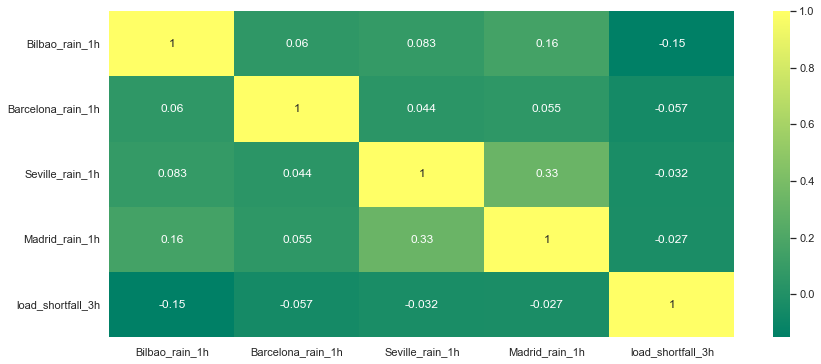

In [229]:
corr(combined, rain_1h, 'load_shortfall_3h')

<AxesSubplot:>

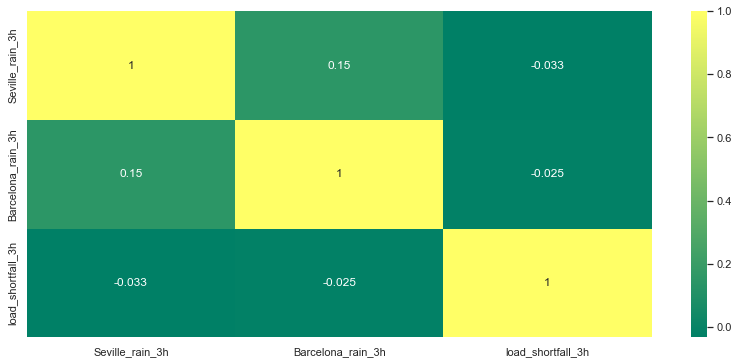

In [230]:
corr(combined, rain_3h, 'load_shortfall_3h')

<AxesSubplot:>

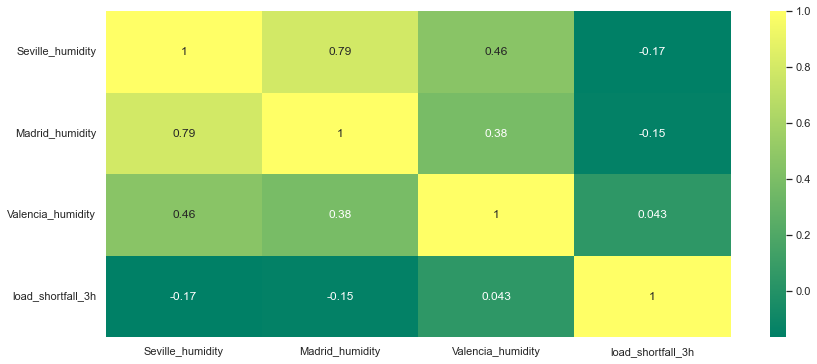

In [231]:
corr(combined, humidity, 'load_shortfall_3h')

<AxesSubplot:>

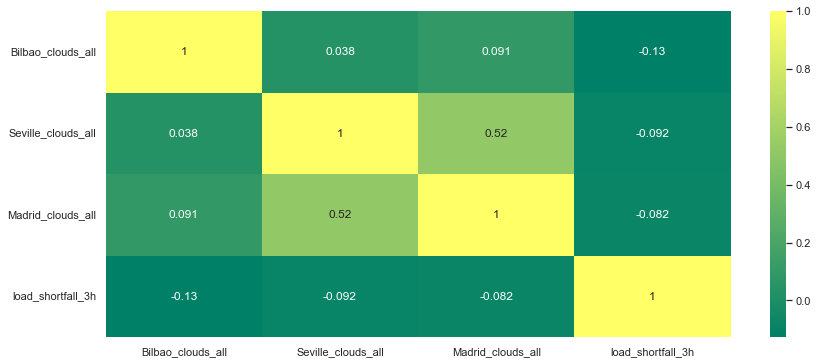

In [232]:
corr(combined, clouds_all, 'load_shortfall_3h')

<AxesSubplot:>

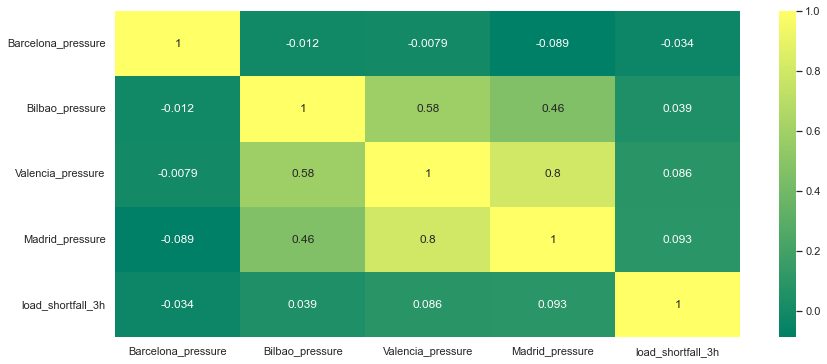

In [233]:
corr(combined, pressure, 'load_shortfall_3h')

<AxesSubplot:>

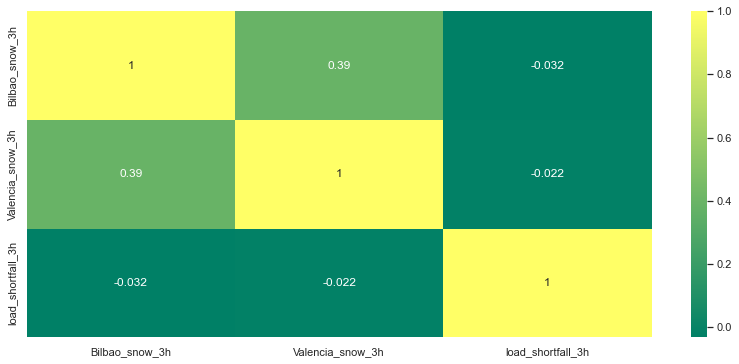

In [234]:
corr(combined, snow_3h, 'load_shortfall_3h')

<AxesSubplot:>

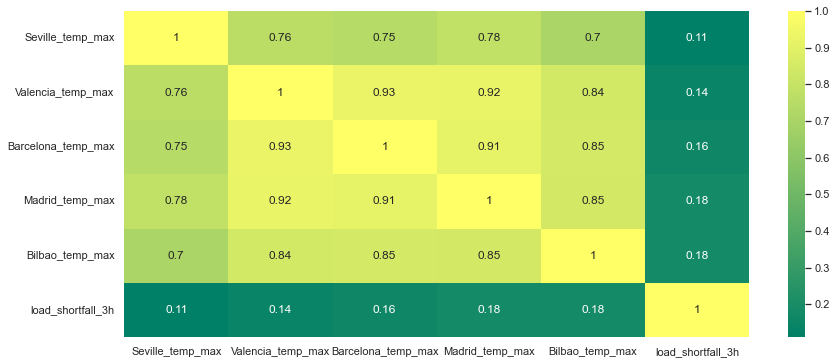

In [235]:
corr(combined, temp_max, 'load_shortfall_3h')

<AxesSubplot:>

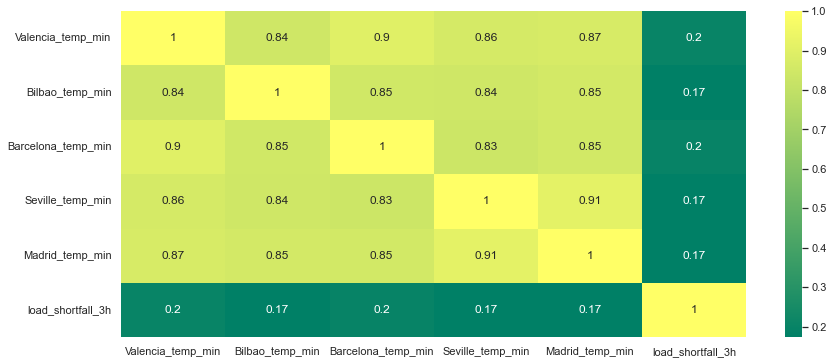

In [236]:
corr(combined, temp_min, 'load_shortfall_3h')

# Outlier Detection and removal

In [237]:
combined[combined['Valencia_wind_speed'] > 13 ]#.head(20)

,time,Day,Month,Year,hour,minute,second,weekday,seasons,time_of_day,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
77,2015-01-11 00:00:00,11,1,2015,0,0,0,Sunday,winter,night,...,268.896000,285.905000,275.697938,275.697938,285.905000,275.697938,277.346000,268.896000,268.896000,14302.333330
97,2015-01-13 12:00:00,13,1,2015,12,0,0,Tuesday,winter,afternoon,...,283.531000,288.516667,285.116500,285.116500,288.516667,285.116500,288.331000,283.531000,283.531000,15482.333330
121,2015-01-16 12:00:00,16,1,2015,12,0,0,Friday,winter,afternoon,...,280.373667,287.823333,278.276229,278.276229,287.823333,278.276229,285.390333,280.373667,280.373667,12444.666670
224,2015-01-29 09:00:00,29,1,2015,9,0,0,Thursday,winter,morning,...,276.808333,284.056667,279.774719,279.774719,284.056667,279.774719,281.450000,276.808333,276.808333,7785.333333
225,2015-01-29 12:00:00,29,1,2015,12,0,0,Thursday,winter,afternoon,...,282.735000,287.123333,280.785885,280.785885,287.123333,280.785885,287.868333,282.735000,282.735000,8439.333333
226,2015-01-29 15:00:00,29,1,2015,15,0,0,Thursday,winter,afternoon,...,284.457333,288.160000,282.540500,282.540500,288.160000,282.540500,288.447667,284.457333,284.457333,5633.333333
228,2015-01-29 21:00:00,29,1,2015,21,0,0,Thursday,winter,evening,...,283.318667,288.373333,284.144833,284.144833,288.373333,284.144833,285.835333,283.318667,283.318667,7940.000000
229,2015-01-30 00:00:00,30,1,2015,0,0,0,Friday,winter,night,...,283.106333,289.310000,283.088115,283.088115,289.310000,283.088115,285.931333,283.106333,283.106333,5757.666667
230,2015-01-30 03:00:00,30,1,2015,3,0,0,Friday,winter,night,...,282.840000,288.983333,281.836281,281.836281,288.983333,281.836281,285.965000,282.840000,282.840000,-2950.666667
231,2015-01-30 06:00:00,30,1,2015,6,0,0,Friday,winter,morning,...,282.750333,287.120000,280.957219,280.957219,287.120000,280.957219,286.125333,282.750333,282.750333,-3627.000000


In [238]:
combined['Valencia_wind_speed'].mean()

2.6928728351761264

In [239]:
combined['Valencia_wind_speed'] = np.where(combined['Valencia_wind_speed'] > 13, np.NaN, combined['Valencia_wind_speed'])

In [240]:
combined['Barcelona_rain_1h'] = np.where((combined['Barcelona_rain_1h'] >= 4) & (combined['seasons'] == 'winter'),
                                         np.NaN, combined['Barcelona_rain_1h'])

In [241]:
combined['Barcelona_pressure'] = np.where(combined['Barcelona_pressure'] > 1500,np.NaN, combined['Barcelona_pressure'])

In [242]:
combined['Bilbao_snow_3h'] = np.where((combined['Bilbao_snow_3h'] > 3) & (combined['seasons'] == 'spring')|
                                                                           (combined['seasons'] == 'autumn')|
                                                                          (combined['seasons'] == 'summer'),
                                      np.NaN, combined['Bilbao_snow_3h'])

In [243]:
combined['Bilbao_snow_3h'].isnull().sum()

5856

In [244]:
import string
combined['Valencia_wind_deg'] = combined['Valencia_wind_deg'].str.extract('(\d+)') #extract the numbers from the string

#Transform the Seville_pressure column 
combined['Seville_pressure'] = combined['Seville_pressure'].str.extract('(\d+)') #extract the numbers from the string


# Filling missing values

## Checking for missing values

In [245]:
check_features_with_missing_values(combined)

Percentage of Overall Missing Values is  1.71 %
Missing Value Estimation :
The Feature Valencia_wind_speed has a total of 36 missing values which translates to 0.31% of values missing in that column
The Feature Barcelona_rain_1h has a total of 12 missing values which translates to 0.1% of values missing in that column
The Feature Bilbao_snow_3h has a total of 5856 missing values which translates to 50.12% of values missing in that column
The Feature Barcelona_pressure has a total of 18 missing values which translates to 0.15% of values missing in that column
The Feature Valencia_pressure has a total of 2522 missing values which translates to 21.59% of values missing in that column
The Feature load_shortfall_3h has a total of 2920 missing values which translates to 24.99% of values missing in that column


## Dealing with missing values

In [246]:
# def fill_missing_values(data):
#     a = [col for col in data.columns if 'load_shortfall_3h' not in col]
#     for i in a:
#         if data[i].isna().sum() > 0:
#             data[i].fillna(data[i].mode())

#             return data
        

In [247]:
#fill_missing_values(combined)

In [248]:
check_features_with_missing_values(combined)

Percentage of Overall Missing Values is  1.71 %
Missing Value Estimation :
The Feature Valencia_wind_speed has a total of 36 missing values which translates to 0.31% of values missing in that column
The Feature Barcelona_rain_1h has a total of 12 missing values which translates to 0.1% of values missing in that column
The Feature Bilbao_snow_3h has a total of 5856 missing values which translates to 50.12% of values missing in that column
The Feature Barcelona_pressure has a total of 18 missing values which translates to 0.15% of values missing in that column
The Feature Valencia_pressure has a total of 2522 missing values which translates to 21.59% of values missing in that column
The Feature load_shortfall_3h has a total of 2920 missing values which translates to 24.99% of values missing in that column


In [249]:
a = [col for col in combined.columns if 'load_shortfall_3h' not in col]

for i in a:
    if combined[i].isna().sum() > 0:
        print (i)

Valencia_wind_speed
Barcelona_rain_1h
Bilbao_snow_3h
Barcelona_pressure
Valencia_pressure


In [250]:
combined['Valencia_wind_speed'] = combined['Valencia_wind_speed'].fillna(combined['Valencia_wind_speed'].mode()[0])
combined['Barcelona_rain_1h'] = combined['Barcelona_rain_1h'].fillna(combined['Barcelona_rain_1h'].mode()[0])
combined['Bilbao_snow_3h'] = combined['Bilbao_snow_3h'].fillna(combined['Bilbao_snow_3h'].mode()[0])
combined['Barcelona_pressure'] = combined['Barcelona_pressure'].fillna(combined['Barcelona_pressure'].mode()[0])
combined['Valencia_pressure'] = combined['Valencia_pressure'].fillna(combined['Valencia_pressure'].mode()[0])

In [251]:
combined.isnull().sum()

time                       0
Day                        0
Month                      0
Year                       0
hour                       0
minute                     0
second                     0
weekday                    0
seasons                    0
time_of_day                0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weat

In [252]:
check_features_with_missing_values(combined)

Percentage of Overall Missing Values is  0.44 %
Missing Value Estimation :
The Feature load_shortfall_3h has a total of 2920 missing values which translates to 24.99% of values missing in that column


## Check data types and assign correct data types

In [253]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 11682
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  11683 non-null  datetime64[ns]
 1   Day                   11683 non-null  int64         
 2   Month                 11683 non-null  int64         
 3   Year                  11683 non-null  int64         
 4   hour                  11683 non-null  int64         
 5   minute                11683 non-null  int64         
 6   second                11683 non-null  int64         
 7   weekday               11683 non-null  category      
 8   seasons               11683 non-null  category      
 9   time_of_day           11683 non-null  category      
 10  Madrid_wind_speed     11683 non-null  float64       
 11  Valencia_wind_deg     11683 non-null  object        
 12  Bilbao_rain_1h        11683 non-null  float64       
 13  Valencia_wind_sp

In [254]:
combined.Valencia_wind_deg.unique()

array(['5', '10', '9', '8', '7', '6', '4', '3', '1', '2'], dtype=object)

In [255]:
combined.Seville_pressure.unique()

array(['25', '23', '24', '21', '16', '9', '15', '19', '22', '11', '8',
       '4', '6', '13', '17', '20', '18', '14', '12', '5', '10', '7', '3',
       '2', '1'], dtype=object)

In [256]:
combined['Valencia_wind_deg'] = pd.Categorical(combined['Valencia_wind_deg'], 
                                               categories=list(range(1,11)), 
                                         ordered= True)

In [257]:
combined['Seville_pressure'] = pd.Categorical(combined['Seville_pressure'], 
                                               categories=list(range(1,26)), 
                                         ordered= True)

In [258]:
cat_cols = ['Day', 'Month', 'Year', 'hour','minute', 'second','weekday', 'seasons', 'time_of_day']

for col in cat_cols:
    combined[col] = combined[col].astype('category')

In [259]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 11682
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  11683 non-null  datetime64[ns]
 1   Day                   11683 non-null  category      
 2   Month                 11683 non-null  category      
 3   Year                  11683 non-null  category      
 4   hour                  11683 non-null  category      
 5   minute                11683 non-null  category      
 6   second                11683 non-null  category      
 7   weekday               11683 non-null  category      
 8   seasons               11683 non-null  category      
 9   time_of_day           11683 non-null  category      
 10  Madrid_wind_speed     11683 non-null  float64       
 11  Valencia_wind_deg     0 non-null      category      
 12  Bilbao_rain_1h        11683 non-null  float64       
 13  Valencia_wind_sp

# Encode data

In [260]:
combined.Valencia_wind_deg.unique()

[NaN]
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

In [261]:
cat_cols = ['Day', 'Month', 'Year', 'hour','minute', 'second','weekday', 'seasons', 'time_of_day', 'Seville_pressure', 'Valencia_wind_deg']
cat_dummy = pd.get_dummies(combined[cat_cols], drop_first=True)

In [262]:
num_cols = [col for col in combined.columns if col not in cat_cols]
num_data = combined[num_cols]

In [263]:
encode = pd.concat([cat_dummy, num_data], axis = 1)

In [264]:
encode.head()

,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,0,0,0,0,0,0,0,0,0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,0,0,0,0,0,0,0,0,0,0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,0,0,0,0,0,0,0,0,0,0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,0,0,0,0,0,0,0,0,0,0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,0,0,0,0,0,0,0,0,0,0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [265]:
X_train = encode[:len(train)]
X_test = encode[len(train):]

In [266]:
X_train = encode[:len(train)]
y_train = X_train['load_shortfall_3h']
X_train.drop(['load_shortfall_3h','time'], axis = 1, inplace= True)

X_test = encode[len(train):]
X_test.drop(['load_shortfall_3h', 'time'], axis = 1, inplace = True)



In [267]:
[X_train.shape, X_test.shape, y_train.shape]

[(8763, 140), (2920, 140), (8763,)]

In [268]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [269]:
y_name = 'load_shortfall_3h'

X_name = list(X_train.columns)

formular = y_name + "~" + "+".join(X_name)
formular

'load_shortfall_3h~Day_2+Day_3+Day_4+Day_5+Day_6+Day_7+Day_8+Day_9+Day_10+Day_11+Day_12+Day_13+Day_14+Day_15+Day_16+Day_17+Day_18+Day_19+Day_20+Day_21+Day_22+Day_23+Day_24+Day_25+Day_26+Day_27+Day_28+Day_29+Day_30+Day_31+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8+Month_9+Month_10+Month_11+Month_12+Year_2016+Year_2017+Year_2018+hour_3+hour_6+hour_9+hour_12+hour_15+hour_18+hour_21+weekday_Tuesday+weekday_Wednesday+weekday_Thursday+weekday_Friday+weekday_Saturday+weekday_Sunday+seasons_summer+seasons_autumn+seasons_winter+time_of_day_afternoon+time_of_day_evening+time_of_day_night+Seville_pressure_2+Seville_pressure_3+Seville_pressure_4+Seville_pressure_5+Seville_pressure_6+Seville_pressure_7+Seville_pressure_8+Seville_pressure_9+Seville_pressure_10+Seville_pressure_11+Seville_pressure_12+Seville_pressure_13+Seville_pressure_14+Seville_pressure_15+Seville_pressure_16+Seville_pressure_17+Seville_pressure_18+Seville_pressure_19+Seville_pressure_20+Seville_pressure_21+Seville_pr

In [270]:
model = ols(formula = formular, data = encode)
fitted = model.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     86.69
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        11:35:49   Log-Likelihood:                -84405.
No. Observations:                8763   AIC:                         1.690e+05
Df Residuals:                    8662   BIC:                         1.697e+05
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              5947.41

In [271]:
y_pred = fitted.predict(X_test)

In [272]:
time = encode['time'][len(train):]

In [273]:
result = pd.DataFrame()
result['time'] = time
result['load_shortfall_3h'] = y_pred

In [274]:
predicted = result.to_csv('clara_my_love.csv', index=False)
predicted

In [275]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
Rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
# Rfr.fit(x, y) 
Rfr.fit(X_train, y_train) 


RandomForestRegressor(random_state=0)

In [276]:
y_pred2 = Rfr.predict(X_test)

In [277]:
result2 = pd.DataFrame()
result2['time'] = time
result2['load_shortfall_3h'] = y_pred2

predicted2 = result2.to_csv('clara_my_love2.csv', index=False)

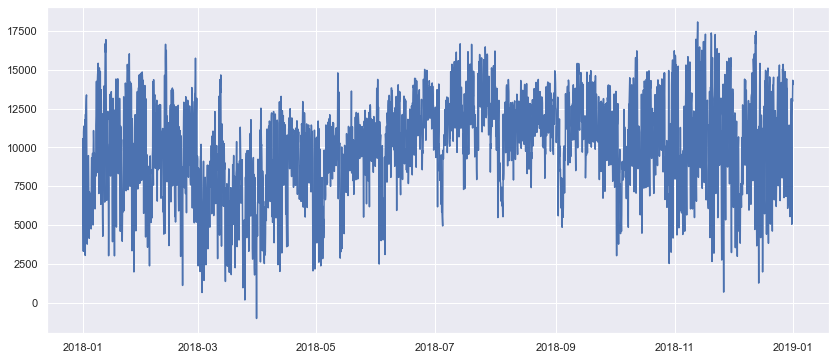

In [278]:
plt.plot(time,y_pred2)

In [279]:
from pandas.plotting import autocorrelation_plot

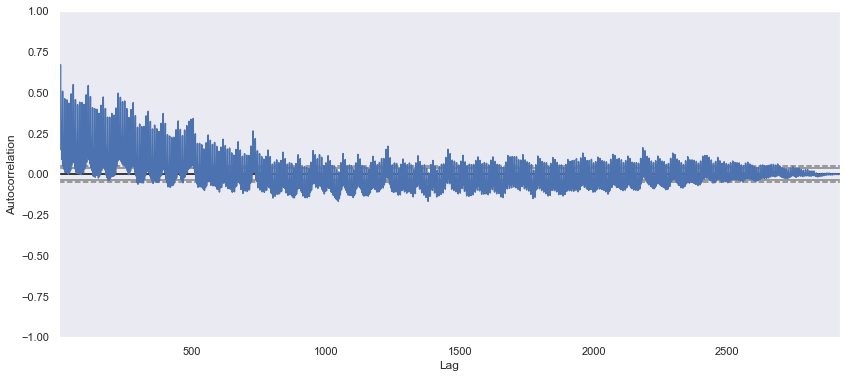

In [280]:
autocorrelation_plot(y_pred2)
#plt.xlim(0,3500 + 500)
plt.show()

In [281]:
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMA

#from statsmodels.tsa.arima_model.ARIMA import SARIMAX

In [282]:
model = sm.tsa.arima.ARIMA(y_pred2, order=(50,0,0))
result3 = model.fit()

KeyboardInterrupt: 

In [ ]:
print(result3.summary())

In [ ]:
time.tail()

In [ ]:
y_pred3 = result3.forecast(len(X_test)) #.predict(#start='2018-01-01', end ='2018-12-31')

In [ ]:
y_pred3

In [ ]:
y_pred3.shape

In [ ]:
result3 = pd.DataFrame()
result3['time'] = time
result3['load_shortfall_3h'] = y_pred3
prediction3 = result3.to_csv('clara_my_love3.csv', index=False)

In [ ]:
prediction3